### Bubble Temperature Analysis: Late November 2021 - December 2024 ###

#### The Data Sets ###
Data sets were derived from WQData Live. Temperature data from November 2021 - March 2023 was measured using the X2 Legacy: X2-01123: [2] CTD Temp. Temperature data from March 2023 - December 2024 was measured using the X2 Legacy: X2-01123: EXO Temp. There is a small gap in the temperature data between March 20 2023 - March ___ 2023. 

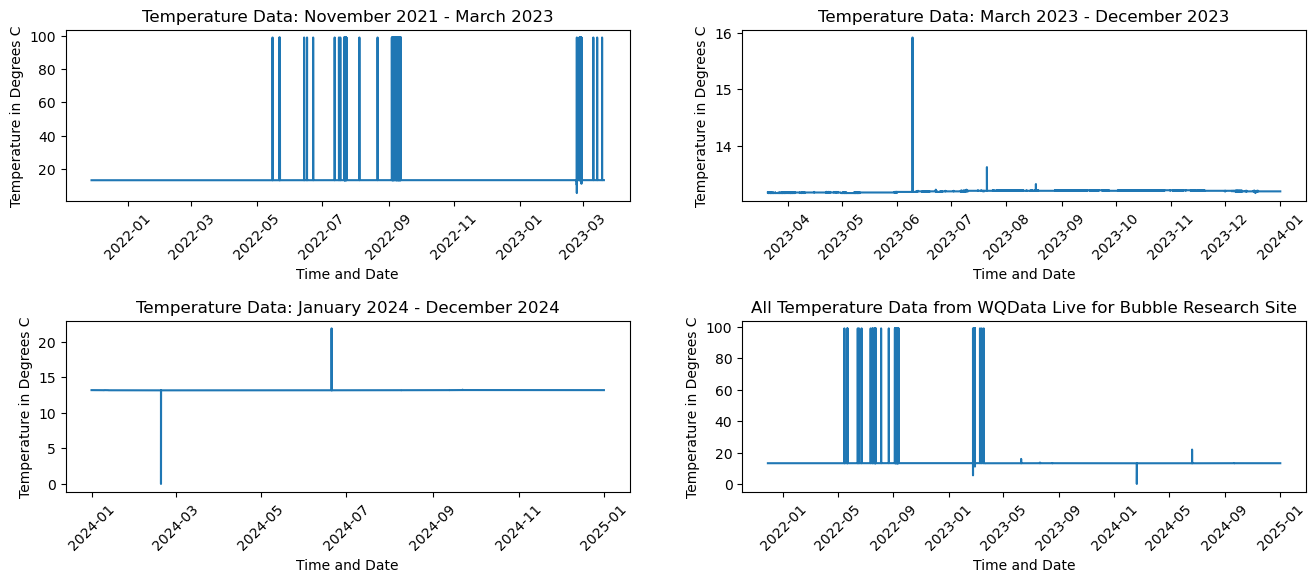

In [112]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

raw_df_2024 = pd.read_csv('/Users/miaaaronson/Desktop/ENE390/Thesis_Work/Data/ALL_BUBBLE_DATA_2024.csv')
raw_df_2023 = pd.read_csv('/Users/miaaaronson/Desktop/ENE390/Thesis_Work/Data/ALL_BUBBLE_DATA_2023.csv')
raw_df_2021to032023 = pd.read_csv('/Users/miaaaronson/Desktop/ENE390/Thesis_Work/Data/ALL_BUBBLE_TEMPS_2021to03:2023 2.csv')

def clean_water_data(raw_df):
    # Consolidate relevant data by selecting specific columns
    df = raw_df[
        [
            "Site",
            "X2",
            "X2.1",
            "X2.2",
            "X2.3",
            "X2.4",
        ]
    ]
    
    # Set the second row as column headers
    df.columns = df.iloc[1]
    
    # Remove the first two rows and reset index
    df = df[2:].reset_index(drop=True)
    
    # Convert column names to a list for manipulation
    column_names = df.columns.to_list()
    
    # Rename specific NaN columns
    column_names[0] = "Time and Date"
    column_names[3] = "pH Value"
    
    # Set updated column names back to DataFrame
    df.columns = column_names
    
    # Rename other columns for clarity
    df.rename(
        columns={
            "C": "Temperature (C)",
            "uS/cm": "Specific Conductivity (uS/cm)",
            "%": "ODO (Saturation)",
            "mg/L": "ODO (mg/L)",
        },
        inplace=True,
    )
    
    # Drop rows where Temperature in Degrees C is NaN
    df = df.dropna(subset=["Temperature (C)"])
    
    # Convert columns to appropriate data types
    df["Time and Date"] = pd.to_datetime(df["Time and Date"], format="%m-%d-%Y %H:%M:%S")
    df["Temperature (C)"] = pd.to_numeric(df["Temperature (C)"], errors="coerce")
    
    return df

final_2021on = raw_df_2021to032023.iloc[2:]
final_2021on = final_2021on.dropna()
final_2021on.rename(columns={'C': 'Temperature (C)'}, inplace=True)
final_2021on["Time and Date"] = pd.to_datetime(final_2021on["Time and Date"], format="%m-%d-%Y %H:%M:%S")
x_1 = final_2021on['Time and Date']
y_1 = final_2021on["Temperature (C)"]

final_2024 = clean_water_data(raw_df_2024)
final_2024 = final_2024[['Time and Date', 'Temperature (C)']]
x_3 = final_2024['Time and Date']
y_3 = final_2024["Temperature (C)"]

final_2023 = clean_water_data(raw_df_2023)
final_2023 = final_2023 [['Time and Date', 'Temperature (C)']]
x_2 = final_2023['Time and Date']
y_2 = final_2023["Temperature (C)"]

all_temp_data = pd.concat([final_2021on,final_2023, final_2024]).reset_index(drop=True)
x = all_temp_data['Time and Date']
y = all_temp_data['Temperature (C)']


all_temp_data.describe() 


fig, axs = plt.subplots(2, 2, figsize=(16, 6))  # 2 rows x 2 columns

# Access each subplot using axs[row][col] or axs[i][j]
axs[0, 0].plot(x_1, y_1)
axs[0, 0].set_title("Temperature Data: November 2021 - March 2023")
axs[0, 0].set_xlabel('Time and Date')
axs[0, 0].set_ylabel('Temperature in Degrees C')


axs[0, 1].plot(x_2, y_2)
axs[0, 1].set_title("Temperature Data: March 2023 - December 2023")
axs[0, 1].set_xlabel('Time and Date')
axs[0, 1].set_ylabel('Temperature in Degrees C')

axs[1, 0].plot(x_3, y_3)
axs[1, 0].set_title("Temperature Data: January 2024 - December 2024")
axs[1, 0].set_xlabel('Time and Date')
axs[1, 0].set_ylabel('Temperature in Degrees C')

axs[1, 1].plot(x, y)
axs[1, 1].set_title("All Temperature Data from WQData Live for Bubble Research Site")
axs[1, 1].set_xlabel('Time and Date')
axs[1, 1].set_ylabel('Temperature in Degrees C')

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.7)
plt.show()


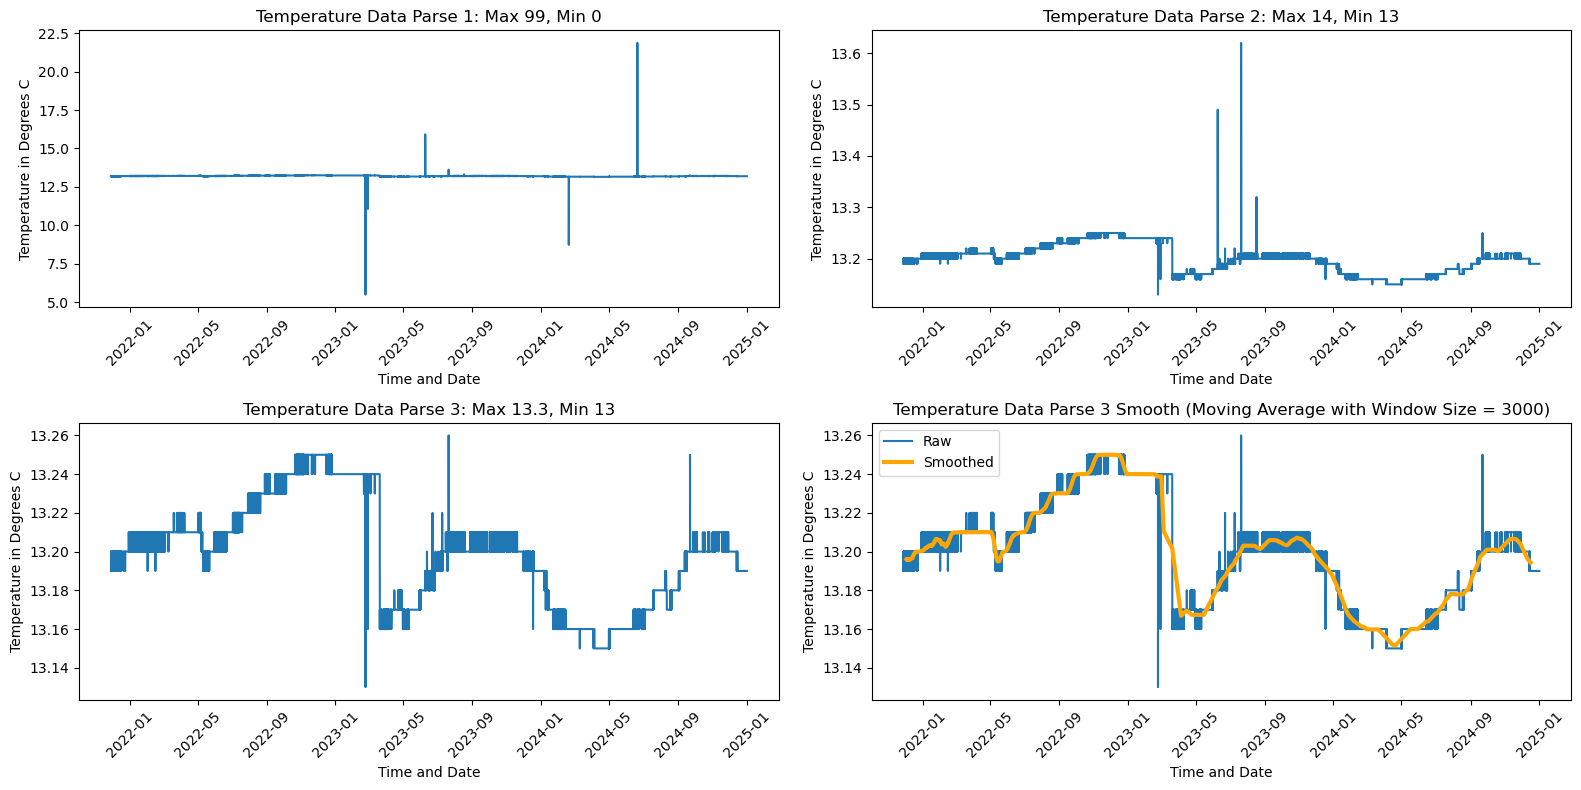

In [113]:
max_threshold_1 = 99
min_threshold_1 = 0

max_threshold_2 = 14
min_threshold_2 = 13

max_threshold_3 = 13.3
min_threshold_3 = 13

# Correct filtering
parse_1 = all_temp_data[(all_temp_data["Temperature (C)"] > min_threshold_1) &
                        (all_temp_data["Temperature (C)"] < max_threshold_1)]

parse_2 = all_temp_data[(all_temp_data["Temperature (C)"] > min_threshold_2) &
                        (all_temp_data["Temperature (C)"] < max_threshold_2)]

parse_3 = all_temp_data[(all_temp_data["Temperature (C)"] > min_threshold_3) &
                        (all_temp_data["Temperature (C)"] < max_threshold_3)]

# Extract values for plotting
x_p1 = parse_1['Time and Date']
y_p1 = parse_1['Temperature (C)']

x_p2 = parse_2['Time and Date']
y_p2 = parse_2['Temperature (C)']

x_p3 = parse_3['Time and Date']
y_p3 = parse_3['Temperature (C)']

# Smooth the full dataset (assuming you want this for the whole dataset)
x_all = all_temp_data['Time and Date']
y_all = all_temp_data['Temperature (C)']
y_smooth = y_p3.rolling(window=3000, center=True).mean()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

axs[0, 0].plot(x_p1, y_p1)
axs[0, 0].set_title("Temperature Data Parse 1: Max 99, Min 0")
axs[0, 0].set_xlabel('Time and Date')
axs[0, 0].set_ylabel('Temperature in Degrees C')

axs[0, 1].plot(x_p2, y_p2)
axs[0, 1].set_title("Temperature Data Parse 2: Max 14, Min 13")
axs[0, 1].set_xlabel('Time and Date')
axs[0, 1].set_ylabel('Temperature in Degrees C')

axs[1, 0].plot(x_p3, y_p3)
axs[1, 0].set_title("Temperature Data Parse 3: Max 13.3, Min 13")
axs[1, 0].set_xlabel('Time and Date')
axs[1, 0].set_ylabel('Temperature in Degrees C')

axs[1, 1].plot(x_p3, y_p3, label='Raw')
axs[1, 1].plot(x_p3, y_smooth, label='Smoothed', color='orange', linewidth = 3)
axs[1, 1].set_title("Temperature Data Parse 3 Smooth (Moving Average with Window Size = 3000)")
axs[1, 1].set_xlabel('Time and Date')
axs[1, 1].set_ylabel('Temperature in Degrees C')
axs[1, 1].legend()

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()
